In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a*x**b
        
        return y_fit-y

def func_powerlaw(x, a, b):
        return a*x**b

def calc_rsquared(x, y, amplitude, exponent):
    yhat = func_powerlaw(x, amplitude, exponent)

    return r2_score(y, yhat)

In [3]:
dataBase_path = r'./'
dataBase_file = r'UUVDatabase.xlsx'
fish_file = r'FrankFishData.xlsx'

In [6]:
data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

data_path = Path(dataBase_path, fish_file)
fish_convDF = pd.read_excel(data_path, sheet_name='Conventional')
fish_bauvDF = pd.read_excel(data_path, sheet_name='BAUV')
fish_bioDF = pd.read_excel(data_path, sheet_name='Animals')

In [7]:
bcf_rad = bcfDF[bcfDF['Min radius [m]'].notnull()]
mpf_rad = mpfDF[mpfDF['Min radius [m]'].notnull()]
lift_rad = liftDF[liftDF['Min radius [m]'].notnull()]

# sort the column values in ascending order
bcf_rad = bcf_rad.sort_values('Min radius [m]')
mpf_rad = mpf_rad.sort_values('Min radius [m]')
lift_rad = lift_rad.sort_values('Min radius [m]')

fish_conv_rad = fish_convDF[fish_convDF['Min radius [m]'].notnull()]
fish_bauv_rad = fish_bauvDF[fish_bauvDF['Min radius [m]'].notnull()]
fish_bio_rad = fish_bioDF[fish_bioDF['Min radius [m]'].notnull()]

# sort the column values in ascending order
fish_conv_rad = fish_conv_rad.sort_values('Min radius [m]')
fish_bauv_rad = fish_bauv_rad.sort_values('Min radius [m]')
fish_bio_rad = fish_bio_rad.sort_values('Min radius [m]')

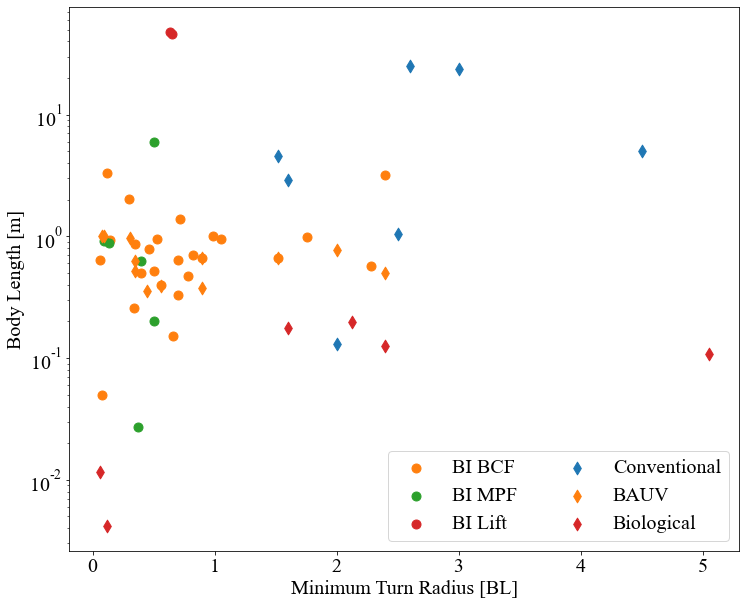

In [9]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')

ax1.scatter(bcf_rad['Length [m]'].values, np.divide(bcf_rad['Min radius [m]'].values, bcf_rad['Length [m]'].values), color='C1', marker='o', label='BI BCF')
ax1.scatter(mpf_rad['Length [m]'].values, np.divide(mpf_rad['Min radius [m]'].values, mpf_rad['Length [m]'].values), color='C2', marker='o', label='BI MPF')
ax1.scatter(lift_rad['Length [m]'].values, np.divide(lift_rad['Min radius [m]'].values, lift_rad['Length [m]'].values), color='C3', marker='o', label='BI Lift')
ax1.scatter(fish_conv_rad['Length [m]'].values, np.divide(fish_conv_rad['Min radius [m]'].values, fish_conv_rad['Length [m]'].values), color='C0', marker='d', label='Conventional')
ax1.scatter(fish_bauv_rad['Length [m]'].values, np.divide(fish_bauv_rad['Min radius [m]'].values, fish_bauv_rad['Length [m]'].values), color='C1', marker='d', label='BAUV')
ax1.scatter(fish_bio_rad['Length [m]'].values, np.divide(fish_bio_rad['Min radius [m]'].values, fish_bio_rad['Length [m]'].values), color='C3', marker='d', label='Biological')


ax1.set_xlabel('Minimum Turn Radius [BL]')
ax1.set_ylabel('Body Length [m]')
ax1.set_yscale('log')
ax1.legend(ncol=2, loc=4)
fig1.savefig('length_radius.pdf', facecolor='w', dpi=300, bbox_inches='tight')

In [10]:
bcf_turn = bcfDF[bcfDF['Max turn rate [deg/s]'].notnull()]
mpf_turn = mpfDF[mpfDF['Max turn rate [deg/s]'].notnull()]
lift_turn = liftDF[liftDF['Max turn rate [deg/s]'].notnull()]

# sort the column values in ascending order

bcf_turn = bcf_turn.sort_values('Max turn rate [deg/s]')
mpf_turn = mpf_turn.sort_values('Max turn rate [deg/s]')
lift_turn = lift_turn.sort_values('Max turn rate [deg/s]')

fish_conv_turn = fish_convDF[fish_convDF['Max turn rate [deg/s]'].notnull()]
fish_bauv_turn = fish_bauvDF[fish_bauvDF['Max turn rate [deg/s]'].notnull()]
fish_bio_turn = fish_bioDF[fish_bioDF['Max turn rate [deg/s]'].notnull()]

# sort the column values in ascending order
fish_conv_turn = fish_conv_turn.sort_values('Max turn rate [deg/s]')
fish_bauv_turn = fish_bauv_turn.sort_values('Max turn rate [deg/s]')
fish_bio_turn = fish_bio_turn.sort_values('Max turn rate [deg/s]')

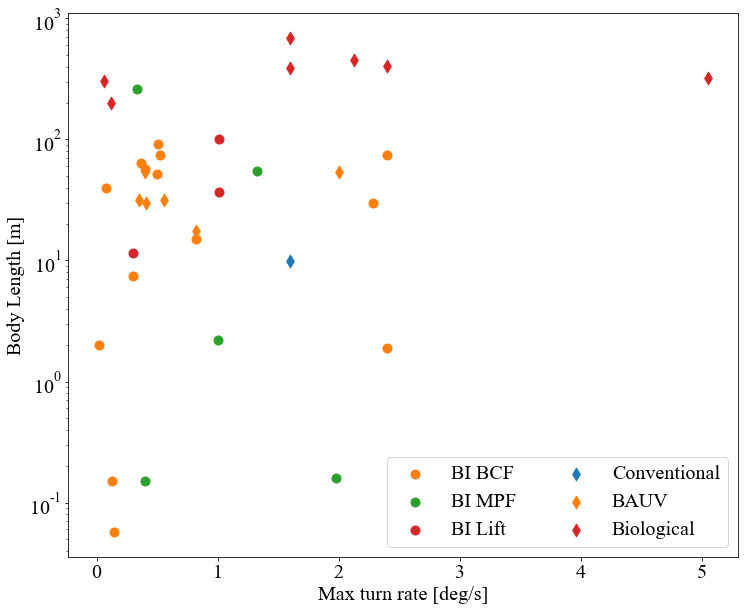

In [12]:
fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w')

ax2.scatter(bcf_turn['Length [m]'].values, bcf_turn['Max turn rate [deg/s]'].values, color='C1', marker='o', label='BI BCF')
ax2.scatter(mpf_turn['Length [m]'].values, mpf_turn['Max turn rate [deg/s]'].values, color='C2', marker='o', label='BI MPF')
ax2.scatter(lift_turn['Length [m]'].values, lift_turn['Max turn rate [deg/s]'].values, color='C3', marker='o', label='BI Lift')
ax2.scatter(fish_conv_turn['Length [m]'].values, fish_conv_turn['Max turn rate [deg/s]'].values, color='C0', marker='d', label='Conventional')
ax2.scatter(fish_bauv_turn['Length [m]'].values, fish_bauv_turn['Max turn rate [deg/s]'].values, color='C1', marker='d', label='BAUV')
ax2.scatter(fish_bio_turn['Length [m]'].values, fish_bio_turn['Max turn rate [deg/s]'].values, color='C3', marker='d', label='Biological')


ax2.set_xlabel('Max turn rate [deg/s]')
ax2.set_ylabel('Body Length [m]')
ax2.set_yscale('log')
ax2.legend(ncol=2, loc=4)
fig2.savefig('length_turnrate.pdf', facecolor='w', dpi=300, bbox_inches='tight')

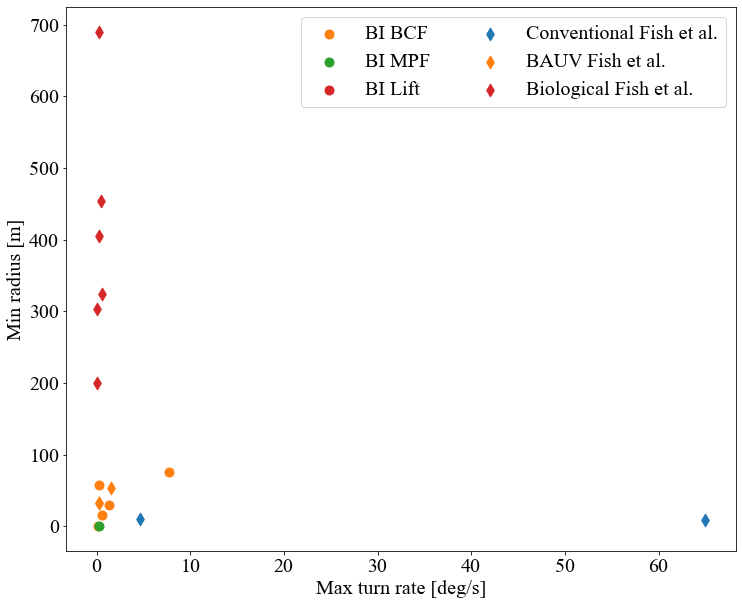

In [14]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w')

ax3.scatter(bcf_turn['Min radius [m]'].values, bcf_turn['Max turn rate [deg/s]'].values, color='C1', marker='o', label='BI BCF')
ax3.scatter(mpf_turn['Min radius [m]'].values, mpf_turn['Max turn rate [deg/s]'].values, color='C2', marker='o', label='BI MPF')
ax3.scatter(lift_turn['Min radius [m]'].values, lift_turn['Max turn rate [deg/s]'].values, color='C3', marker='o', label='BI Lift')
ax3.scatter(fish_conv_turn['Min radius [m]'].values, fish_conv_turn['Max turn rate [deg/s]'].values, color='C0', marker='d', label='Conventional Fish et al.')
ax3.scatter(fish_bauv_turn['Min radius [m]'].values, fish_bauv_turn['Max turn rate [deg/s]'].values, color='C1', marker='d', label='BAUV Fish et al.')
ax3.scatter(fish_bio_turn['Min radius [m]'].values, fish_bio_turn['Max turn rate [deg/s]'].values, color='C3', marker='d', label='Biological Fish et al.')


ax3.set_xlabel('Max turn rate [deg/s]')
ax3.set_ylabel('Min radius [m]')
#ax2.set_yscale('log')
ax3.legend(ncol=2)